In [13]:
from torch.utils.data import DataLoader
from CelebASuperResDataset import CelebASuperResDataset
import matplotlib.pyplot as plt

In [14]:
def plot_batch(lr_batch, hr_batch, n=4):
    """
    Affiche les n premiers couples (LR, HR) d'un batch.
    lr_batch, hr_batch : tenseurs [B, C, H, W]
    """
    fig, axs = plt.subplots(n, 2, figsize=(6, 2*n))

    for i in range(n):
        # LR
        axs[i, 0].imshow(lr_batch[i].permute(1, 2, 0).numpy())
        axs[i, 0].set_title("LR (upscaled)")
        axs[i, 0].axis("off")

        # HR
        axs[i, 1].imshow(hr_batch[i].permute(1, 2, 0).numpy())
        axs[i, 1].set_title("HR (original)")
        axs[i, 1].axis("off")

    plt.tight_layout()
    plt.show()

LR shape: torch.Size([16, 3, 128, 128])
HR shape: torch.Size([16, 3, 128, 128])


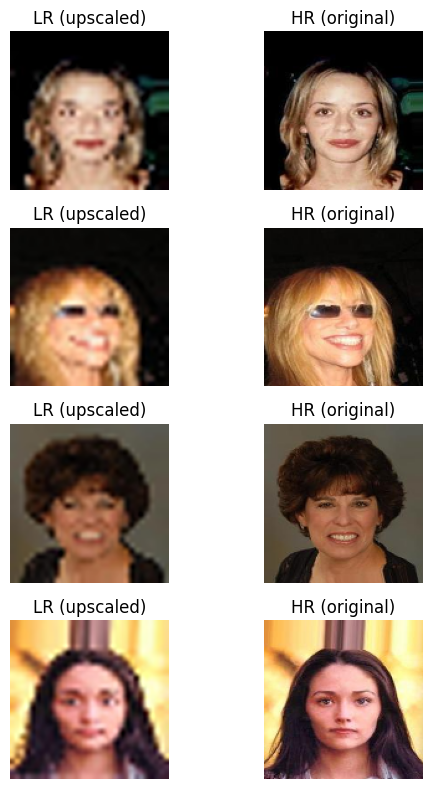

In [15]:
# Crée le dataset
dataset = CelebASuperResDataset("Dataset/img_align_celeba/img_align_celeba", hr_size=128, scale=4)

# Crée un DataLoader
loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Exemple : récupérer un batch
lr, hr = next(iter(loader))

print("LR shape:", lr.shape)  # [batch, 3, 128, 128]
print("HR shape:", hr.shape)  # [batch, 3, 128, 128]

plot_batch(lr, hr, n=4)